### 1 a

In [45]:
import matplotlib.pyplot as plt
import numpy as np



def rk4(f, y0, t0, t_end, h):

    t_vals = np.arange(t0, t_end + h, h)
    y_vals = np.zeros_like(t_vals)
    y_vals[0] = y0

    for i in range(1, len(t_vals)):
        t_n = t_vals[i - 1]
        y_n = y_vals[i - 1]
        k1 = f(t_n, y_n)
        k2 = f(t_n + h / 2, y_n + h / 2 * k1)
        k3 = f(t_n + h / 2, y_n + h / 2 * k2)
        k4 = f(t_n + h, y_n + h * k3)

        y_vals[i] = y_n + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_vals, y_vals




def plot():
    y0 = 1
    t0 = 0
    t_end = 5
    h = 0.1

    t_vals, y_vals = rk4(f, y0, t0, t_end, h)

    exact_y_vals = exact(t_vals)

    multiplier = 1_000_000
    err = np.abs(y_vals - exact_y_vals) * multiplier

    plt.figure(figsize=(15, 10))
    plt.plot(t_vals, y_vals, label="RK4")
    plt.plot(t_vals, exact_y_vals, label="exact")
    plt.plot(t_vals, err, label=f"error * {multiplier}" )
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.legend()
    plt.grid(True)
    plt.show()


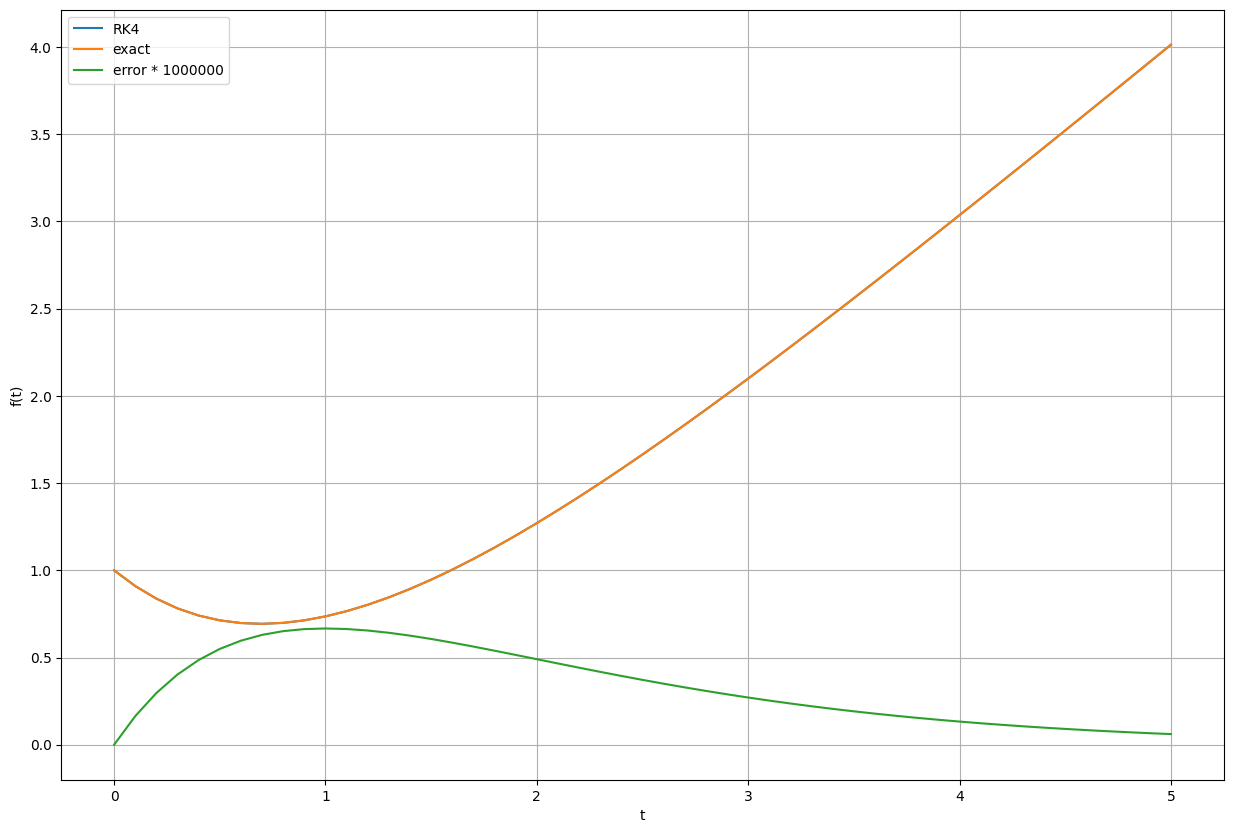

In [46]:
def f(t, y):
    return t - y


def exact(t):
    return t - 1 + 2 * np.exp(-t)

plot()

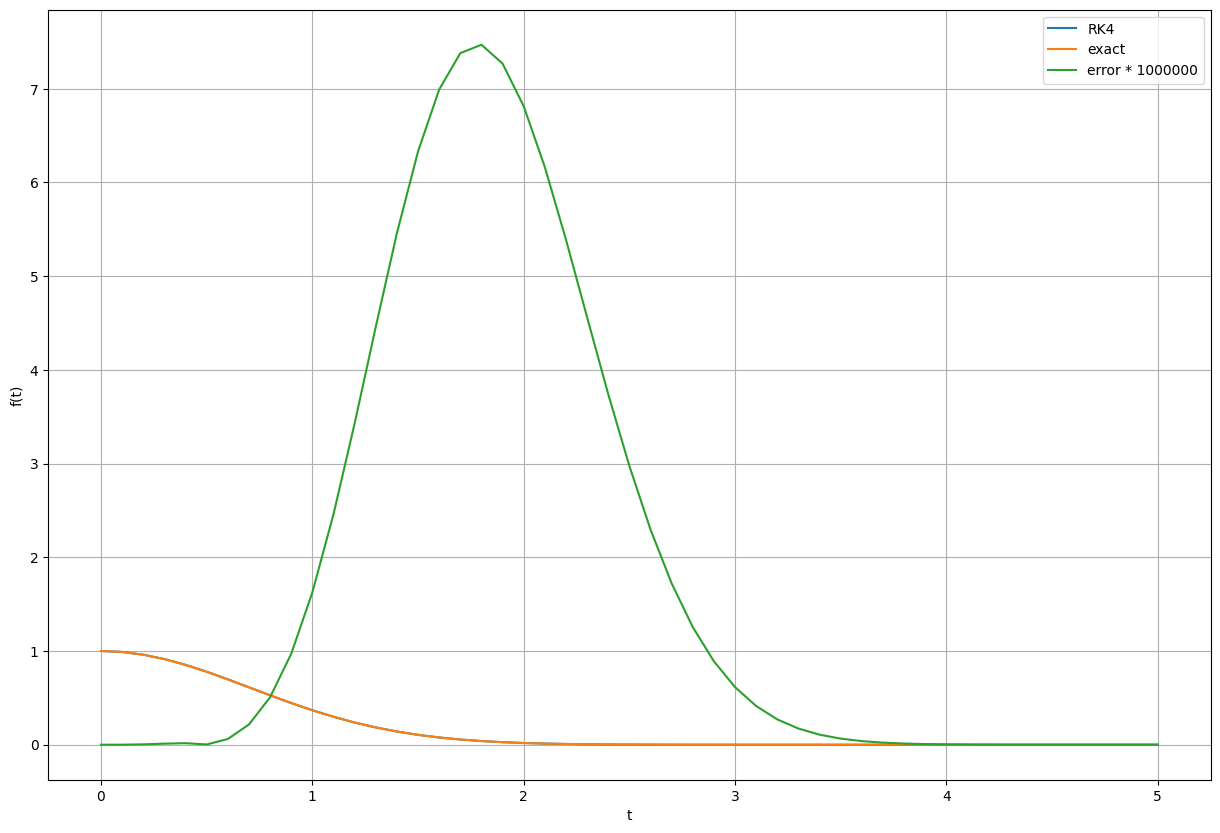

In [47]:
def f(t, y):
    return -2 * t * y

def exact(t):
    return np.exp(-t**2)

plot()

### 1 b

-------- Order --------
4.160953119135059
-------------
4.080841740878048
-------------
4.0402342466065715
-------------


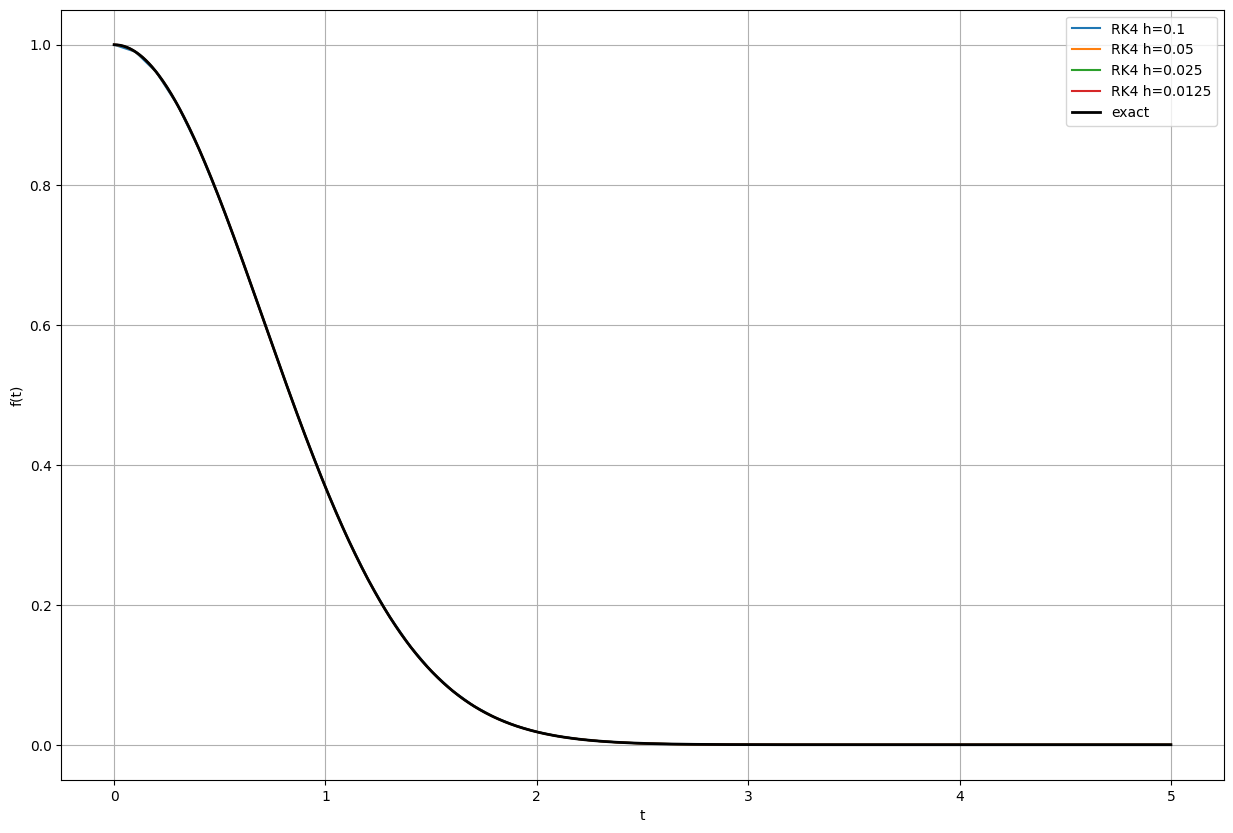

In [44]:
def plot2():
    y0 = 1
    t0 = 0
    t_end = 5

    h_vals = [0.1, 0.05, 0.025, 0.0125]

    max_errors = []

    plt.figure(figsize=(15, 10))
    for h in h_vals:
        t_vals, y_vals = rk4(f, y0, t0, t_end, h)
        exact_y_vals = exact(t_vals)
        max_err = np.linalg.norm(y_vals - exact_y_vals, ord=np.inf)
        max_errors.append(max_err)

        plt.plot(t_vals, y_vals, label=f"RK4 h={h}")

    # Calculate and plot the exact solution
    t_fine = np.linspace(t0, t_end, 1000)
    plt.plot(t_fine, exact(t_fine), label="exact", color='black', linewidth=2)

    print("-------- Order --------")
    orders = []
    for i in range(1, len(max_errors)):
        order = np.log(max_errors[i - 1] / max_errors[i]) / np.log(
            h_vals[i - 1] / h_vals[i])
        orders.append(order)
        print(order)
        print("-------------")

    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot2()

### 4 c

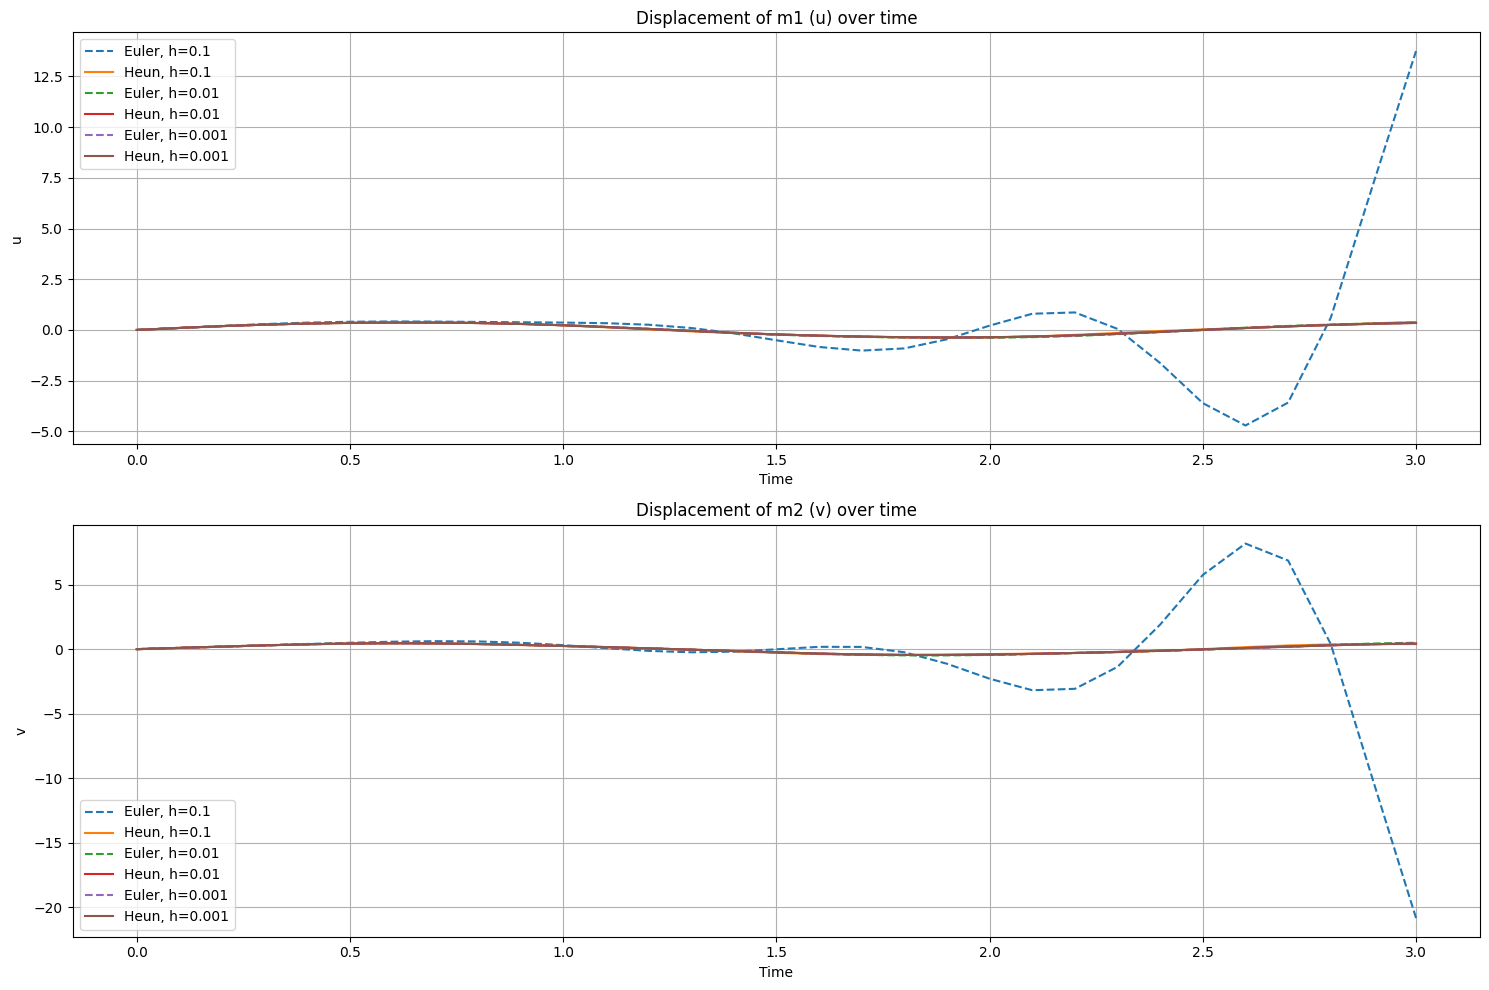

In [40]:
k1 = 100
k2 = 200
m1 = 10
m2 = 5


def derivatives(t, x):
    x1, x2, x3, x4 = x
    dx1_dt = x2
    dx2_dt = (-k1 * x1 + k2 * (x3 - x1)) / m1
    dx3_dt = x4
    dx4_dt = (-k2 * (x3 - x1)) / m2
    return np.array([dx1_dt, dx2_dt, dx3_dt, dx4_dt])


def eulers(derivatives, t_range, x0, h):
    t_values = np.arange(t_range[0], t_range[1] + h, h)
    x_values = np.zeros((len(t_values), len(x0)))
    x_values[0] = x0

    for i in range(1, len(t_values)):
        x_values[i] = x_values[i - 1] + h * derivatives(
            t_values[i - 1], x_values[i - 1])

    return t_values, x_values


def heuns(derivatives, t_range, x0, h):
    t_values = np.arange(t_range[0], t_range[1] + h, h)
    x_values = np.zeros((len(t_values), len(x0)))
    x_values[0] = x0

    for i in range(1, len(t_values)):
        x_prev = x_values[i - 1]
        t_prev = t_values[i - 1]

        x_pred = x_prev + h * derivatives(t_prev, x_prev)

        avg_slope = (derivatives(t_prev, x_prev) +
                     derivatives(t_prev + h, x_pred)) / 2
        x_values[i] = x_prev + h * avg_slope

    return t_values, x_values


x0 = [0, 1, 0, 1]
t_range = (0, 3)
step_lengths = [0.1, 0.01, 0.001]

plt.figure(figsize=(15, 10))

for h in step_lengths:
    t_euler, x_euler = eulers(derivatives, t_range, x0, h)

    t_heun, x_heun = heuns(derivatives, t_range, x0, h)

    plt.subplot(2, 1, 1)
    plt.plot(t_euler, x_euler[:, 0], label=f'Euler, h={h}', linestyle='--')
    plt.plot(t_heun, x_heun[:, 0], label=f'Heun, h={h}')
    plt.title("Displacement of m1 (u) over time")
    plt.xlabel("Time")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t_euler, x_euler[:, 2], label=f'Euler, h={h}', linestyle='--')
    plt.plot(t_heun, x_heun[:, 2], label=f'Heun, h={h}')
    plt.title("Displacement of m2 (v) over time")
    plt.xlabel("Time")
    plt.ylabel("v")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### 4 d

<Figure size 1500x1000 with 0 Axes>

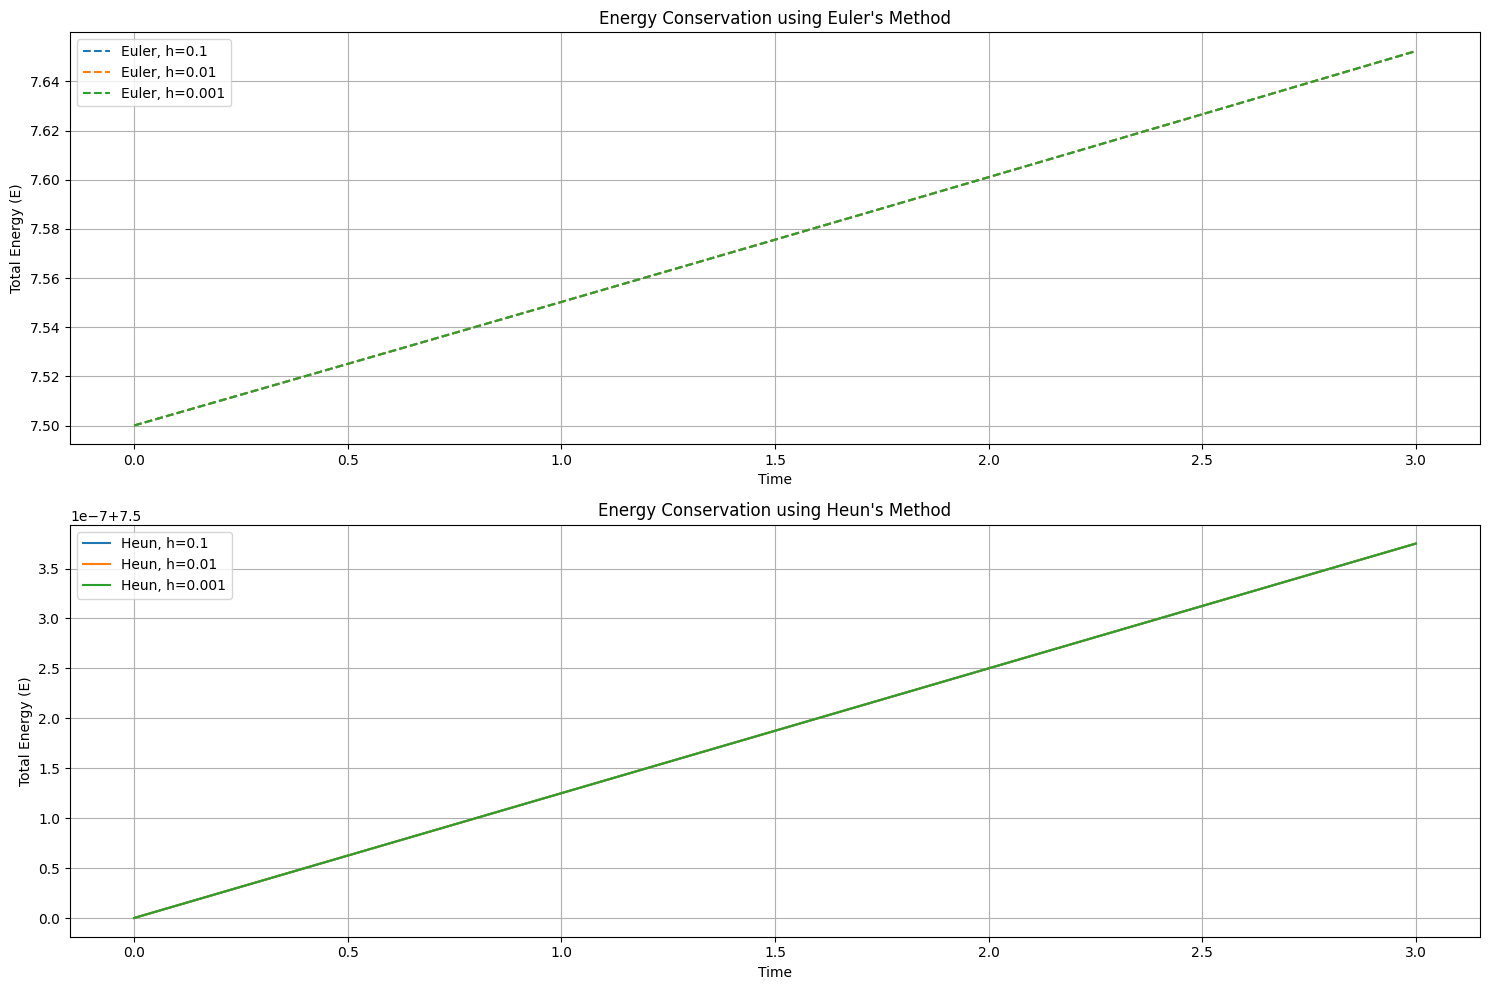

In [41]:

def total_energy(x, m1, m2, k1, k2):
    x1, x2, x3, x4 = x  # x1 = u, x2 = u', x3 = v, x4 = v'
    kinetic_energy = 0.5 * m1 * x2**2 + 0.5 * m2 * x4**2
    potential_energy = 0.5 * k1 * x1**2 + 0.5 * k2 * (x1 - x3)**2
    return kinetic_energy + potential_energy


energies_euler = {}
energies_heun = {}

plt.figure(figsize=(15, 10))

for h in step_lengths:
    energies_euler[h] = [total_energy(x, m1, m2, k1, k2) for x in x_euler]
    energies_heun[h] = [total_energy(x, m1, m2, k1, k2) for x in x_heun]

plt.figure(figsize=(15, 10))

for h in step_lengths:
    plt.subplot(2, 1, 1)
    plt.plot(t_euler, energies_euler[h], label=f'Euler, h={h}', linestyle='--')
    plt.title("Energy Conservation using Euler's Method")
    plt.xlabel("Time")
    plt.ylabel("Total Energy (E)")
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t_heun, energies_heun[h], label=f'Heun, h={h}')
    plt.title("Energy Conservation using Heun's Method")
    plt.xlabel("Time")
    plt.ylabel("Total Energy (E)")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Notice the scale on Heun's is extremly low